<a href="https://colab.research.google.com/github/MariaEdPaixao/IoT-CP5/blob/main/cp2_redes_neurais_com_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CP2 parte 1 - Redes Neurais com Keras

## Integrantes - 2TDSPJ

*   **RM 558843** - Laura de Oliveira Cintra

*   **RM 558832** - Maria Eduarda Alves da Paixão

*   **RM 554456** - Vinícius Saes de Souza


##*Exercício 1*
Dataset: Wine Dataset (UCI)

`O dataset Wine é um conjunto de dados clássico usado para classificação. Ele contém 178 amostras de vinho, com 13 características (variáveis) para cada amostra, como níveis de componentes químicos e propriedades físicas dos vinhos.`

Essas características são usadas para classificar os vinhos em duas classes (tipos de vinho).
1. Treinar uma rede neural em Keras para classificar vinhos em 3 classes.
- Configuração mínima: 2 camadas ocultas com 32 neurônios cada, função de ativação ReLU.
- Camada de saída com 3 neurônios, função de ativação Softmax.
- Função de perda: categorical_crossentropy.
- Otimizador: Adam.
2. Comparar os resultados com um modelo do scikit-learn (RandomForestClassifier ou
LogisticRegression).
3. Registrar métricas de acurácia e discutir qual modelo teve melhor desempenho.


In [ ]:
# 1° - Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, utils

# Reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# 2° - Carregar dataset Wine
data = load_wine(as_frame=True) # objeto do tipo Bunch (um dicionário especial do Scikit-Learn).
X = data.data # data.data -> As features (colunas com os atributos do vinho, como álcool, acidez, etc.)
y = data.target # data.target -> O rótulo (classe do vinho: 0, 1 ou 2)

print("Dimensão de X:", X.shape)
print("Classes:", np.unique(y))


Dimensão de X: (178, 13)
Classes: [0 1 2]


In [ ]:
data.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [ ]:
# o data é um objeto especial do scikit-learn, por isso não da pra usar .head() nele, portanto para ver o dataset completo:
print(data.keys())

data.frame # Um DataFrame completo, que já junta data e target em uma tabela só

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
# Divisão treino/teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 3° - Criar e treinar rede neural Keras

num_features = X_train.shape[1]
num_classes = len(np.unique(y))

# One-hot encoding para labels
y_train_oh = utils.to_categorical(y_train, num_classes)
y_test_oh = utils.to_categorical(y_test, num_classes)

# Construir modelo
model = models.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar com early stopping
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_oh,
    validation_split=0.15,
    epochs=200,
    batch_size=16,
    callbacks=[es],
    verbose=1
)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5605 - loss: 1.0223 - val_accuracy: 0.3182 - val_loss: 1.0920
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6401 - loss: 0.8920 - val_accuracy: 0.4545 - val_loss: 0.9318
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7138 - loss: 0.7945 - val_accuracy: 0.6818 - val_loss: 0.7909
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8460 - loss: 0.7107 - val_accuracy: 0.9091 - val_loss: 0.6731
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9110 - loss: 0.6365 - val_accuracy: 1.0000 - val_loss: 0.5724
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9201 - loss: 0.5683 - val_accuracy: 1.0000 - val_loss: 0.4841
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9384 - loss: 0.5037 - val_accuracy: 1.0000 - val_loss: 0.4080
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9424 - loss: 0.4427 - val_accuracy: 1.0000 - val_loss:

In [ ]:
# 4° - Avaliar modelo neural
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_oh, verbose=0)
print(f"Acurácia no conjunto de teste (Keras): {test_acc:.4f}")

# Previsões e métricas
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=1)
print("\nRelatório de classificação (Keras):")
print(classification_report(y_test, y_pred_nn, digits=4))
print("Matriz de confusão (Keras):\n", confusion_matrix(y_test, y_pred_nn))


Acurácia no conjunto de teste (Keras): 1.0000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Relatório de classificação (Keras):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        12
           1     1.0000    1.0000    1.0000        14
           2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        36
   macro avg     1.0000    1.0000    1.0000        36
weighted avg     1.0000    1.0000    1.0000        36

Matriz de confusão (Keras):
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


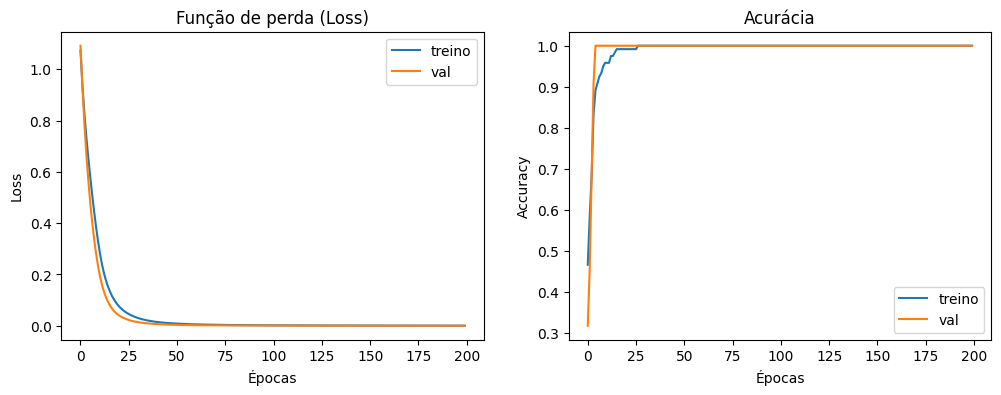

In [ ]:
# 5° - Gráficos de treino/validação
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='val')
plt.title('Função de perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='treino')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# 6° - Comparar com modelos clássicos

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAcurácia RandomForest: {acc_rf:.4f}")

# Logistic Regression
lr = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs', random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Acurácia Logistic Regression: {acc_lr:.4f}")



Acurácia RandomForest: 1.0000
Acurácia Logistic Regression: 0.9722


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# 7° - Comparar resultados

summary = pd.DataFrame([
    ['Rede Neural (Keras)', test_acc],
    ['Random Forest', acc_rf],
    ['Logistic Regression', acc_lr]
], columns=['Modelo', 'Acurácia de Teste'])

print("\nResumo dos Resultados:")
display(summary)



Resumo dos Resultados:


,Modelo,Acurácia de Teste
0,Rede Neural (Keras),1.000000
1,Random Forest,1.000000
2,Logistic Regression,0.972222




* **Registrar métricas de acurácia e discutir qual modelo teve melhor desempenho.**

Os resultados mostraram que a rede neural e o modelo Random Forest tiveram 100% de acurácia, ou seja, acertaram todas as classificações. Já a Regressão Logística teve 97,22%, que também é um resultado muito bom. No geral, os dois primeiros modelos tiveram o melhor desempenho, mas o Random Forest é mais simples de usar e treinar do que a rede neural.

##*Exercício 2*
Dataset: California Housing Dataset

`O dataset California Housing é um conjunto de dados clássico de regressão. Ele contém informações sobre diferentes distritos habitacionais, com o objetivo de prever o valor médio das casas em cada região.`

1. Treinar uma rede neural em **Keras** para prever o valor médio das casas.  
   - Configuração mínima: 3 camadas ocultas com 64, 32 e 16 neurônios, função de ativação **ReLU**.  
   - Camada de saída com 1 neurônio, função de ativação **Linear**.  
   - Função de perda: **mse**.  
   - Otimizador: **Adam**.  
2. Comparar os resultados com um modelo do **scikit-learn** (*LinearRegression* ou *RandomForestRegressor*).  
3. Registrar métricas de erro (**RMSE** ou **MAE**) e discutir qual modelo teve melhor desempenho.

In [ ]:
# 1° - Importar bibliotecas
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 1° - Carregar e inspecionar o dataset
from sklearn.datasets import fetch_california_housing

data_cal = fetch_california_housing(as_frame=True)
X_reg = data_cal.data
y_reg = data_cal.target

print('Shape X_reg:', X_reg.shape)

Shape X_reg: (20640, 8)


In [ ]:
# 2° - Separar treino e teste (80/20)
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print('Train shape:', Xreg_train.shape, 'Test shape:', Xreg_test.shape)

# Normalizar features
scaler = StandardScaler()
Xreg_train_scaled = scaler.fit_transform(Xreg_train)
Xreg_test_scaled = scaler.transform(Xreg_test)

Train shape: (16512, 8) Test shape: (4128, 8)


In [ ]:
# 3° - Construir modelo Keras para regressão
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(Xreg_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Mostrar a estrutura do modelo
model_reg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,605 (37.52 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,404 (25.02 KB)

In [ ]:
# 4° - Treinar modelo
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_reg.fit(
    Xreg_train_scaled, yreg_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3730 - mae: 0.8309 - val_loss: 0.4308 - val_mae: 0.4678
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3882 - mae: 0.4448 - val_loss: 0.3875 - val_mae: 0.4426
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3528 - mae: 0.4201 - val_loss: 0.3696 - val_mae: 0.4310
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3355 - mae: 0.4072 - val_loss: 0.3536 - val_mae: 0.4212
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3226 - mae: 0.3980 - val_loss: 0.3449 - val_mae: 0.4111
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3135 - mae: 0.3906 - val_loss: 0.3320 - val_mae: 0.4047
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3044 - mae: 0.3834 - val_loss: 0.3311 - val_mae: 0.3986
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2993 - mae: 0.3771 - val_loss: 0.3220 - val_mae: 0.3941
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

In [ ]:
# 5° - Avaliar
y_pred = model_reg.predict(Xreg_test_scaled).ravel()

rmse = np.sqrt(mean_squared_error(yreg_test, y_pred))
mae = mean_absolute_error(yreg_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step
RMSE: 0.5356
MAE: 0.3625


In [ ]:
# 6° - Comparar com outros modelos
# Linear Regression
lr = LinearRegression()
lr.fit(Xreg_train_scaled, yreg_train)
y_pred_lr = lr.predict(Xreg_train_scaled)
rmse_lr = np.sqrt(mean_squared_error(yreg_train, y_pred_lr))
mae_lr = mean_absolute_error(yreg_train, y_pred_lr)

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(Xreg_train, yreg_train)
y_pred_rf = rf.predict(Xreg_train)
rmse_rf = np.sqrt(mean_squared_error(yreg_train, y_pred_rf))
mae_rf = mean_absolute_error(yreg_train, y_pred_rf)

In [ ]:
# 7° Comparativo
summary2 = pd.DataFrame({
    "Modelo": ["Rede Neural (Keras)", "Linear Regression", "Random Forest"],
    "RMSE": [rmse, rmse_lr, rmse_rf],
    "MAE": [mae, mae_lr, mae_rf]
})

summary2

,Modelo,RMSE,MAE
0,Rede Neural (Keras),0.535648,0.362524
1,Linear Regression,0.719676,0.528628
2,Random Forest,0.185695,0.121036


**Registrar métricas de erro (RMSE ou MAE) e discutir qual modelo teve melhor desempenho.**

Observando as métricas de erro apresentadas na tabela de resumo, o modelo **Random Forest** obteve os menores valores (RMSE: 0.1857, MAE: 0.1210), indicando o melhor desempenho para esta tarefa de regressão.

A **Rede Neural em Keras** também demonstrou um desempenho robusto e significativamente melhor do que a Regressão Linear, alcançando resultados intermediários (RMSE: 0.5356, MAE: 0.3625). Este resultado indica que a arquitetura neural é eficaz na captura das relações dos dados. Em contraste, a Regressão Linear teve os maiores erros (RMSE: 0.7197, MAE: 0.5286), performando menos eficazmente no dataset.

No geral, o **Random Forest** foi o modelo com a melhor performance, mas a **Rede Neural (Keras)** se destacou como um modelo de aprendizado de máquina mais avançado com um bom nível de acurácia, superando o modelo linear clássico.